# Residual plot

## Preparation


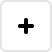
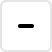
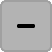
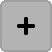
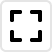
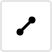
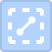
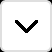
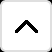
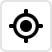

In [1]:
import pandas as pd

from lets_plot import *
LetsPlot.setup_html()

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/iris.csv")
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Plots

### Default plot

In [3]:
ggplot(df, aes("petal_length", "petal_width")) + geom_residuals()

### Add parameters and layers

In [4]:
ggplot(df, aes("petal_length", "petal_width")) + \
    geom_residuals(aes(fill="species"), shape=23, size=4, color='white', \
                   tooltips=layer_tooltips().title("@species")\
                                            .line("petal length|@petal_length")\
                                            .format("@..residual..", ".2f")\
                                            .line("residual|@..residual..")) + \
    scale_fill_brewer(type='qual', palette='Set1') + \
    xlab("petal length") + ylab("residuals (petal width)") + \
    ggsize(800, 500) + ggtitle("Independent variable vs. residuals") + \
    theme_classic() + flavor_high_contrast_dark()

### 'residual' stat

In [5]:
ggplot(df, aes("petal_length", "petal_width")) + \
    geom_pointrange(aes(ymax="..residual.."), ymin=0, data=df, stat='residual', \
                    shape=21, size=.75, color="#54278f", fill="#f768a1", tooltips='none')